In [51]:
import pandas as pd
from pandasql import sqldf

In [52]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.keys())  # 颜色变化
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 8]  # 图片像素
plt.rcParams['savefig.dpi'] = 600  # 分辨率
plt.rcParams["font.family"] = "Times New Roman"
compares_markers = ['s', 'o', '^', '*', 'v', 'x', 'D']


def Plotings(df_list: list, markers, labels: list = None, metric_name="NDCG@10",
             x_label=r'${\rm \epsilon}$', save_file_path: str = None, errorbar: bool = True, y_lim: tuple = (50, 100),
             marker_size=20):
    """
    Args:
        df_list: Got only 3 columns including x,y and std.
        markers:
        labels:
        metric_name:
        x_label:
        save_file_path:

    Returns:

    """
    # plt.figure(figsize=(10,8),dpi=150)
    fig, ax = plt.subplots()
    for i, df in enumerate(df_list):
        # names = df.columns.values
        if not errorbar:
            plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=labels[i],
                     marker=markers[i], markersize=marker_size,
                     linestyle='-', color=mcolors.TABLEAU_COLORS[colors[i]], linewidth=3)
        else:
            plt.errorbar(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], label=labels[i], marker=markers[i],
                         markersize=marker_size,
                         linestyle='-', color=mcolors.TABLEAU_COLORS[colors[i]], linewidth=3, capsize=15, capthick=3)
    label_size = 38
    ax.tick_params(axis="x", labelsize=label_size)
    ax.tick_params(axis="y", labelsize=label_size)
    ax.set_xlim(df.iloc[0, 0], df.iloc[-1, 0])
    ax.set_ylim(*y_lim)
    plt.yticks(fontsize=label_size)
    plt.xticks(fontsize=label_size)
    # plt.yticks([60, 70, 80, 90, 100], fontsize=25)
    # plt.xticks([1,2,4,5,6,8])
    ax.set_xlabel(x_label, fontsize=label_size)
    ax.set_ylabel(metric_name, fontsize=label_size)
    plt.legend(loc='lower right', prop={'size': 20})
    ax.grid()
    if save_file_path:
        plt.savefig(save_file_path, format="pdf", dpi=600, bbox_inches='tight')
    plt.show()

In [53]:
def load_table(file_path, type="csv", dtypes: dict = None):
    if type == "csv":
        dtypes = object if not dtypes else dtypes
        res_df = pd.read_csv(file_path, index_col=0, header=0, dtype=dtypes, na_filter=False)
        # res_df = res_df.fillna(value="N/A")
    else:
        raise ValueError("invalid data type")
    return res_df

In [54]:
def return_sql(query):
    pysqldf = lambda q: sqldf(q, globals())
    pandasSQL_solution = pysqldf(query)
    return pandasSQL_solution

In [55]:
file_path_1 = "./results/DPLP-PS.csv"
file_path_2 = "./results/DPLP-NS.csv"
file_path_3 = "./results/LapGraph.csv"
file_path_4 = "./results/SEAL.csv"

In [56]:
dtypes = {"epsilon": "Int64"}

In [57]:
df_1 = load_table(file_path_1, dtypes=dtypes)
df_2 = load_table(file_path_2, dtypes=dtypes)
df_3 = load_table(file_path_3, dtypes=dtypes)
df_4 = load_table(file_path_4, dtypes=dtypes)

In [58]:
len(df_3.iloc[0])

24

In [59]:
#  合并三个方法的结果
query = """
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_1
UNION ALL
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_2
UNION ALL
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_3
"""

In [60]:
res = return_sql(query)
res.head()

,dataset,experiment,max_node_degree,num_hop,highest_val,final_test,val_std,test_std,best_epoch,final_round_val,...,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph
0,Celegans,results/Celegans_2023-09-06-14-57-39,40,2,75.511860,80.560093,4.387761,7.529905,16.2,37.698929,...,1746,80,1,2.93,DPLP,0.1,1,128,3143,0
1,Celegans,results/Celegans_2023-09-06-15-01-40,40,2,76.486300,83.354660,2.202060,2.313358,13.4,40.023655,...,1746,80,2,0.74,DPLP,0.1,1,128,3143,0
2,Celegans,results/Celegans_2023-09-06-15-04-09,40,2,77.493265,84.123286,0.253746,0.290369,9.2,50.329194,...,1746,80,4,0.4,DPLP,0.1,1,128,3143,0
3,Celegans,results/Celegans_2023-09-06-15-06-41,40,2,77.656548,83.915844,0.082096,0.218505,11.6,57.671003,...,1746,80,5,0.33,DPLP,0.1,1,128,3143,0
4,Celegans,results/Celegans_2023-09-06-15-09-12,40,2,77.795190,83.921085,0.074309,0.110563,12.8,61.385768,...,1746,80,6,0.28,DPLP,0.1,1,128,3143,0


In [61]:
def generated_sub_df_query(df, data_name: str):
    query = f"""
            SELECT {df}.epsilon, {df}.final_test, {df}.test_std FROM {df}
            WHERE {df}.dataset == '{data_name}'
            ORDER BY {df}.epsilon ASC
            """
    return query

In [62]:
data_name = "Yeast"
sub_df_list = []
for df in ["df_1", "df_2", "df_3", "df_4"]:
    # for df in [df_1,df_2,df_3]:
    query = generated_sub_df_query(df, data_name)
    sub_df = return_sql(query)
    print(sub_df)
    sub_df_list.append(sub_df)

   epsilon  final_test  test_std
0        1   90.545332  3.394207
1        2   90.347134  4.054648
2        4   91.688165  1.492636
3        5   92.016010  1.175717
4        6   92.114746  1.170902
5        8   92.114000  1.213880
6       10   91.678564  1.391225
   epsilon  final_test  test_std
0        1   81.283870  7.269238
1        2   82.888387  7.269238
2        4   85.888387  7.269238
3        5   86.234387  6.785991
4        6   85.491998  6.278106
5        8   86.089571  5.669798
6       10   86.594707  5.187993
   epsilon  final_test   test_std
0        1   50.033771  16.444411
1        2   53.879980  11.418330
2        4   54.820890   8.904621
3        5   65.569133   9.508131
4        6   75.522176   8.615486
5        8   85.617217   7.450356
6       10   91.404180   3.120897
   epsilon  final_test  test_std
0        1       97.91      0.52
1        2       97.91      0.52
2        4       97.91      0.52
3        5       97.91      0.52
4        6       97.91      0.52
5 

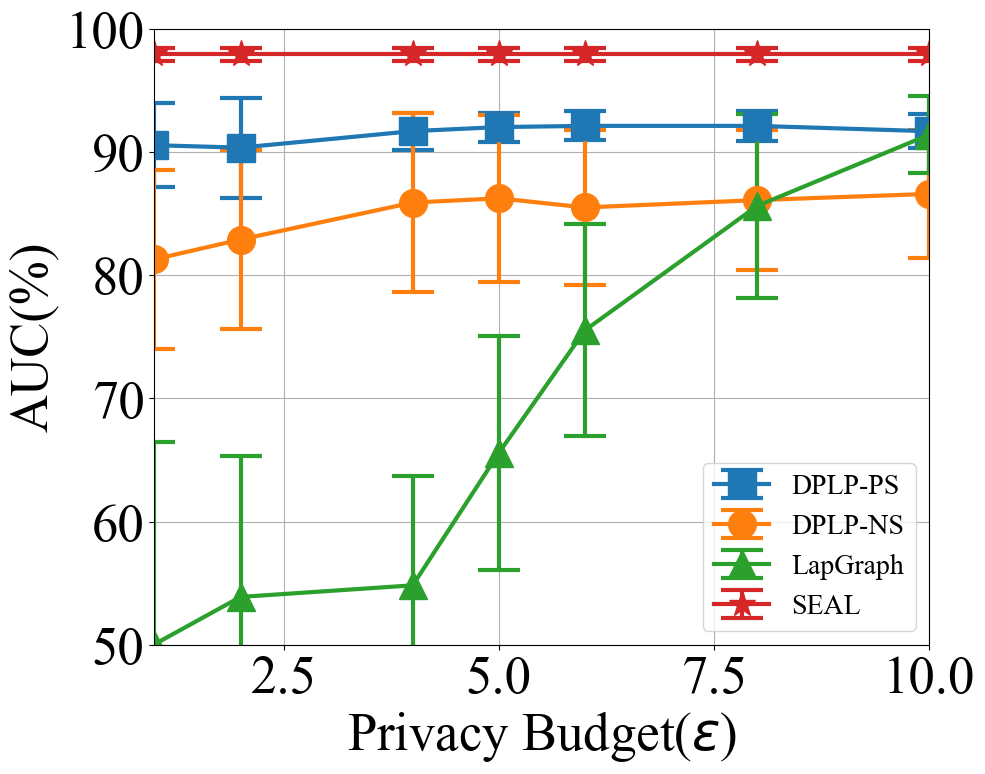

In [63]:
Plotings(sub_df_list, markers=compares_markers, labels=["DPLP-PS", "DPLP-NS", "LapGraph", "SEAL"], metric_name="AUC(%)",
         x_label=r'Privacy Budget($\varepsilon$)', save_file_path=f"./results_figures/{data_name}_comparison.pdf")

----
# Analysis on Validation Trend During Training

In [74]:
# The results file path
# file_path_1 = "./results/DPLP-PS_latest.csv"
file_path_1 = "./results/all_results_2023-09-09-13-54-48.csv"
# file_path_1 = "./results/all_results_2023-09-17-18-42-39.csv"
# file_path_1 = "./results/all_results_2023-09-17-19-51-28.csv"
# file_path_2 = "./results/DPLP-NS.csv"
# file_path_3 = "./results/LapGraph.csv"

In [75]:
import numpy as np

dtypes = {"epsilon": "Int32"}
df = load_table(file_path_1, dtypes=dtypes)
df
# df["val_trend"] = np.array(df["val_trend"].values.split(","))
# df["val_trend"] = df["val_trend"].apply(lambda x: x.split(","))
# df["val_trend"] = df["val_trend"].apply(lambda x: list(map(float, x.split(","))))
# df["val_trend"].values
# print(df["val_trend"][26])

,dataset,experiment,max_node_degree,num_hop,highest_val,final_test,val_std,test_std,best_epoch,final_round_val,...,dp_method,sens,parameter_indicator,eps,lr,max_norm,batch_size,train_samples,neighborhood_subgraph,val_trend
8,Celegans,results/Celegans_2023-09-08-19-47-04,40,2,77.666310,84.183116,0.254276,2.815104e-01,21.285714,56.206293,...,DPLP,64,0.027739,6.872202,0.100,1,32,3143,False,"0.5007931814555114,0.5685703021598941,0.514483..."
11,Celegans,results/Celegans_2023-09-08-19-48-29,40,2,77.809693,83.914222,0.165688,1.586764e-01,25.285714,61.624098,...,DPLP,160,0.027739,7.052808,0.100,1,128,3143,False,"0.6412613931833329,0.7050890334450358,0.698440..."
15,Celegans,results/Celegans_2023-09-08-19-51-59,40,2,77.740700,84.328014,0.118861,1.115501e-01,29.142857,61.697080,...,DPLP,160,0.027739,7.311368,0.100,1,1024,3143,False,"0.5557151305229365,0.5596646109656163,0.585447..."
21,Celegans,results/Celegans_2023-09-08-20-17-09,40,2,77.656923,84.425808,0.248803,1.683586e-01,30.571429,57.792186,...,DPLP,160,0.027739,7.335280,0.100,1,3143,3143,False,"0.6229924061089053,0.6713623947509222,0.695493..."
26,Celegans,results/Celegans_2023-09-08-21-31-25,40,2,77.777074,83.934342,0.147735,3.250550e-01,32.428571,65.803084,...,DPLP,64,0.027739,8.040885,0.010,1,32,3143,False,"0.5281391681450819,0.5295917696863882,0.498563..."
27,Celegans,results/Celegans_2023-09-08-21-32-52,40,2,77.757362,83.870550,0.264783,4.984171e-01,25.857143,72.050679,...,DPLP,160,0.027739,7.270271,0.010,1,128,3143,False,"0.5437587414228455,0.5528709413984398,0.546769..."
28,Celegans,results/Celegans_2023-09-08-21-36-31,40,2,77.804530,84.398045,0.097638,3.750570e-01,30.428571,73.315780,...,DPLP,160,0.027739,7.495586,0.010,1,1024,3143,False,"0.5313588277810631,0.533147006092009,0.5494353..."
29,Celegans,results/Celegans_2023-09-08-22-01-00,40,2,76.353337,83.515716,3.269388,2.296793e+00,24.714286,74.491707,...,DPLP,160,0.027739,6.431103,0.010,1,3143,3143,False,"0.5299132663118471,0.5389292519688735,0.557125..."
38,Celegans,results/Celegans_2023-09-08-23-15-02,40,2,69.426375,69.309079,7.241541,1.296602e+01,39.142857,69.024152,...,DPLP,64,0.027739,8.692103,0.001,1,32,3143,False,"0.5279373527451588,0.525977866013348,0.5277191..."
40,Celegans,results/Celegans_2023-09-08-23-16-25,40,2,65.328584,63.912163,5.237856,1.053455e+01,39.571429,63.186994,...,DPLP,160,0.027739,9.122202,0.001,1,128,3143,False,"0.5287047206030057,0.5275736156871579,0.528463..."


In [76]:
dataname = "USAir"
comparison_line_label = "lr"
batch_size = '128'
q = f"""
SELECT df.{comparison_line_label}, df.val_trend
FROM df
WHERE df.dataset == '{dataname}' and df.batch_size == {batch_size}
ORDER BY df.{comparison_line_label} ASC
"""

In [77]:
sub_df = return_sql(q)
sub_df["val_trend"] = sub_df["val_trend"].apply(lambda x: list(map(lambda z: round(float(z) * 100, 4), x.split(','))))
sub_df

,lr,val_trend
0,0.001,"[28.9938, 28.9813, 28.4866, 29.076, 29.5791, 3..."
1,0.010,"[27.674, 30.418, 41.6163, 44.2482, 46.9426, 50..."
2,0.100,"[39.6854, 40.55, 51.4866, 50.0601, 61.0865, 63..."


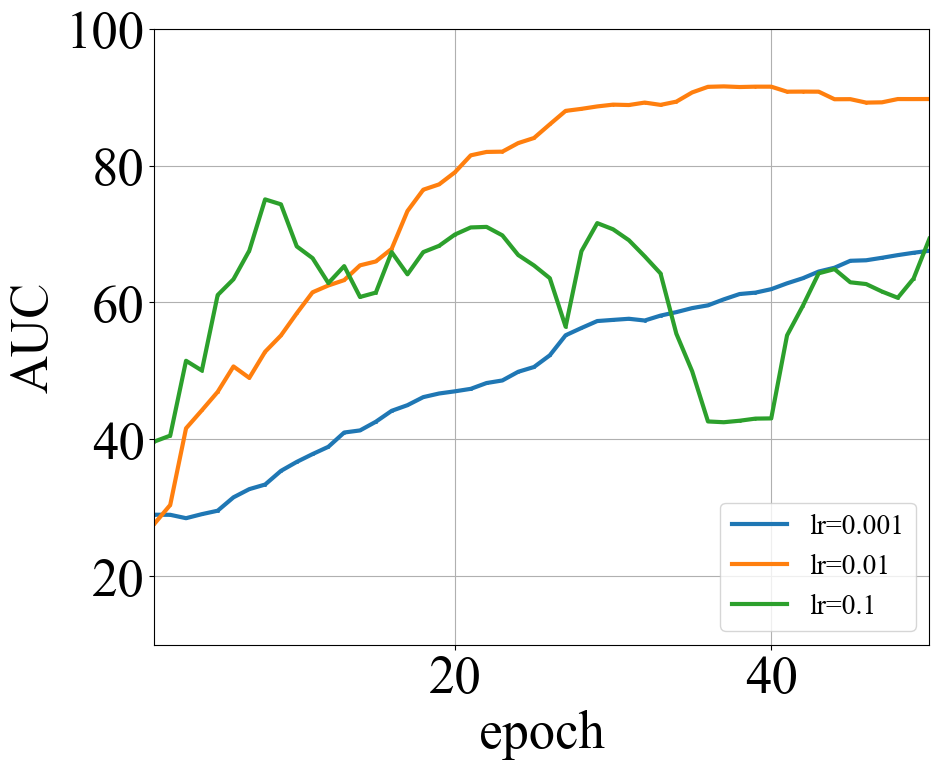

In [78]:
epochs = np.arange(1, 51)
df_list = []
label_list = []  # The lable of comparison line
epsilon_list = []
for idx, (label, row) in sub_df.iterrows():
    assert len(epochs) == len(row), "same length assertion!"
    df_tmp = pd.DataFrame.from_dict({"epochs": epochs, "AUC": row})
    df_list.append(df_tmp)
    label_list.append(f"{comparison_line_label}={label}")
Plotings(df_list, compares_markers, labels=label_list, metric_name="AUC", x_label="epoch", errorbar=False,
         y_lim=(10, 100), marker_size=1,
         save_file_path=f'./results_figures/{dataname}_val_trend_with_varying_{comparison_line_label}_batch_{batch_size}.pdf')

# Parameter Selection

In [ ]:
file_path = "./results/parameter_selection.csv"

In [ ]:
dtypes = {"epsilon": "Int32"}
df = load_table(file_path, dtypes=dtypes)

In [ ]:
def generate_query(dataname, comparison_line_label, y):
    # dataname = "Celegans"
    # comparison_line_label = "tuple"
    # y = "indicator"
    q = f"""
    SELECT df.{comparison_line_label}, df.{y}
    FROM df
    WHERE df.dataset == '{dataname}'
    ORDER BY df.{comparison_line_label} ASC
    """
    return q

In [ ]:
# dataname = "Celegans"
# comparison_line_label = "tuple"
# y = "final_test"
# q = f"""
# SELECT df.{comparison_line_label}, df.{y}
# FROM df
# WHERE df.dataset == '{dataname}'
# ORDER BY df.{comparison_line_label} ASC
# """

In [ ]:
data_name = "Yeast"
q = generate_query(data_name, "tuple", "final_test")
df_1 = return_sql(q)
df_1["final_test"] = df_1["final_test"] / 100.
q = generate_query(data_name, "tuple", "indicator")
df_2 = return_sql(q)
df_2["indicator"] = 1 / df_2["indicator"]
df_2

In [ ]:
Plotings([df_1, df_2], markers=compares_markers, labels=["final_test", "indicator"],
         metric_name="AUC or Indicator Value",
         x_label=r"$(\theta,k)$", save_file_path=f"./results_figures/{data_name}_parameter_selection.pdf",
         errorbar=False, y_lim=(0, 1.5))

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("C.ele", "USAir", "Yeast", "PB")
penguin_means = {
    'k=2': (84.44536641, 93.73954254, 88.17570529, 90.86618598),
    'k=3': (71.46563019, 76.63447846, 89.5032494, 80.08132536),
    'k=4': (74.46414534, 81.64827341, 91.74978651, 84.59257278),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
patterns = ['-', '/', '+']
temp = list(zip(patterns, penguin_means.items()))
for pattern, (attribute, measurement) in list(zip(patterns, penguin_means.items())):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=pattern)
    # rects.set_hatch(pattern = "*")
    # ax.bar_label(rects, padding=3, fontsize=15)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC(%)', fontsize=30)
ax.set_xlabel('Dataset', fontsize=30)
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.legend(loc='upper left', ncol=3, fontsize=30)
ax.set_ylim(60, 100)
plt.savefig("./results_figures/ablation_study_k.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()